# Assignment 3 - Building a Custom Visualization

In this assignment you must choose __one__ of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.

Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="assets/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="assets/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with at least three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
#Your Code Here

In [22]:
df.describe()
df.info()

#Your Code Here
# seems columns aint arranged right, and would be more appropriate
# fir the years to be the cols
df = df.transpose()
df


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1992 to 1995
Columns: 3650 entries, 0 to 3649
dtypes: float64(3650)
memory usage: 114.3 KB


,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657
...,...,...,...,...
3645,24185.008589,-37333.493572,-71861.846997,39937.199964
3646,-56826.729535,103019.841174,26375.113219,139472.114293
3647,-67319.766489,179746.127403,-29328.078384,59386.186379
3648,113377.299342,13455.493990,65858.761714,73362.229590


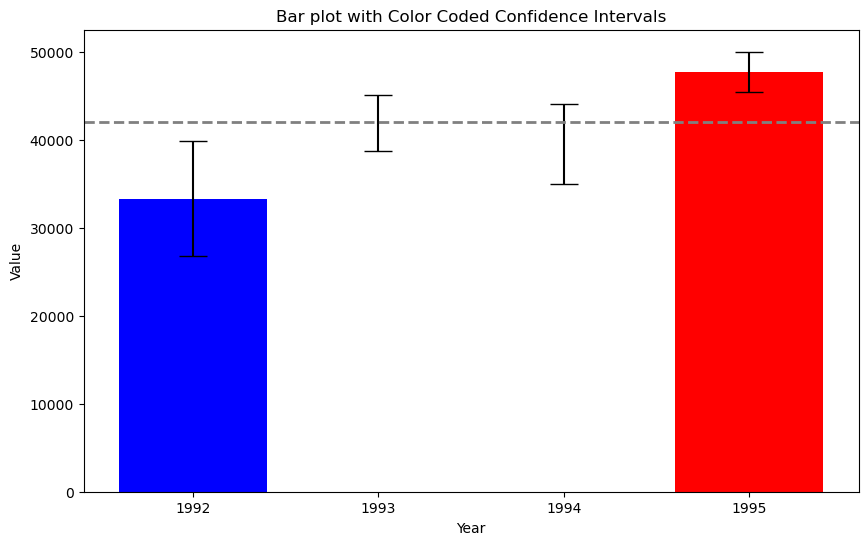

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#  mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0]
conf_intervals = stats.t.ppf(0.975, n-1) * (stds / np.sqrt(n))

# Function to determine color based on y-axis value
def bar_color(y, mean, conf_interval):
    if y > mean + conf_interval:
        return 'blue'
    elif y < mean - conf_interval:
        return 'red'
    else:
        return 'white'

# User-provided y-axis value 
y_value = 42000

# Determine colors for each bar
colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(means.index, means, yerr=conf_intervals, color=colors, capsize=10)
plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  # Horizontal line for y-axis value of interest
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar plot with Color Coded Confidence Intervals')
plt.xticks(means.index)
plt.show()


## Easiest option

C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\1857495095.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\1857495095.py:73: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Color Scale')


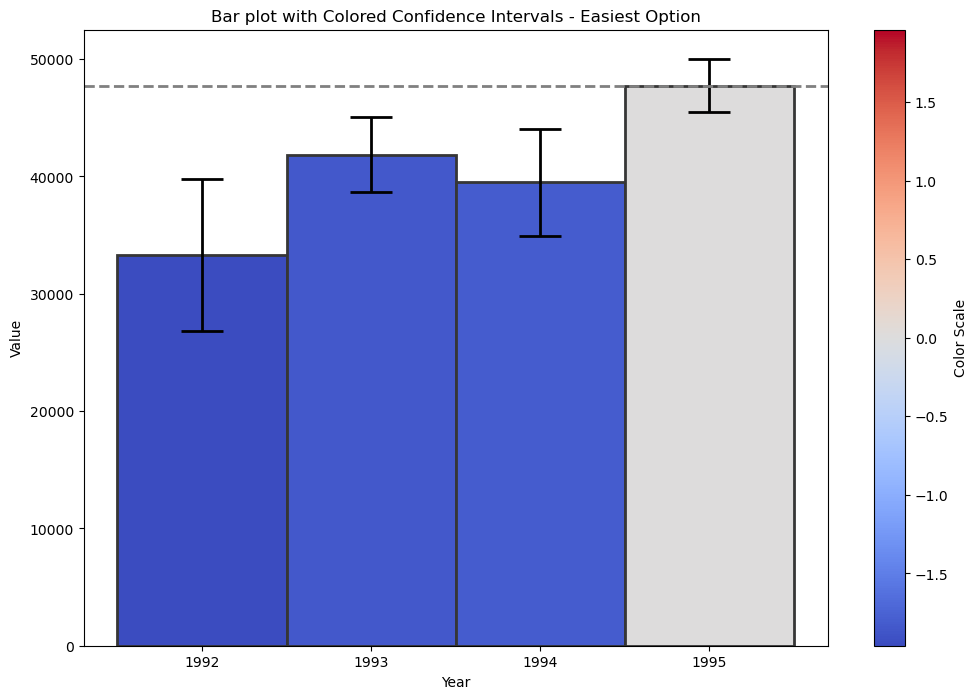

In [101]:
# ======== importing the various important libraries for this project ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize
from matplotlib import cm

# Set seed for reproducibility
np.random.seed(12345)

# Generate data and create DataFrame (was trying to see if the vals will change)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# rearranging df to appropriate orders
df = df.transpose()

# Calculate mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0] #
conf_intervals = stats.t.ppf(0.975, n-1) * (stds / np.sqrt(n))
# NB. 95% confidence interval = 0.975 with n-1 degrees of freedom


# User-provided y-axis value of interest
y_value = 47743.550969
# y_value = int(input('Enter y value: '))
# y_value = float(input('Enter y value: ')) # to account for dp

# Function to determine color based on y-axis value
def bar_color(y, mean, conf_interval):
    if y > mean + conf_interval:
        return 'darkblue'   #  if the entered y value is more, bar is blue
    
    elif y < mean - conf_interval:
        return 'darkred'
    
    else:
        return 'white' # if entered val == mean, prints white

    
# Determine colors for each bar
colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]
# y_val is constant in this case. So we're pairing mean and conf_interval and loading it into our function
#  this is done to determine the color of the bar


# Create a color map
cmap = cm.get_cmap('coolwarm')
norm = Normalize(vmin=-1.96, vmax=1.96)  # Corresponds to the normalization going to be used for t

# Plotting
plt.figure(figsize=(12,8))
bars = plt.bar(range(len(means)), means, yerr=conf_intervals, color=cmap(norm((means - y_value) / conf_intervals)), 
               capsize=15, width = 1, edgecolor='#363636', linewidth = 2, error_kw={'capthick':2, 'elinewidth':2} )
                                                        # visit the mpl docs to understand why I increased the use of error_kw
    # error_kw is just an attribue that we pass a dic of the various input args of the plt.errorbar ags. Without the error_kw args, we cant access the values for these error bar args
                        
plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  # Horizontal line for y-axis value of interest
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar plot with Colored Confidence Intervals - Easiest Option')
plt.xticks(range(len(means)), means.index)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Color Scale')

plt.show()
# print(means)

1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64


C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\494213449.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Color Scale')


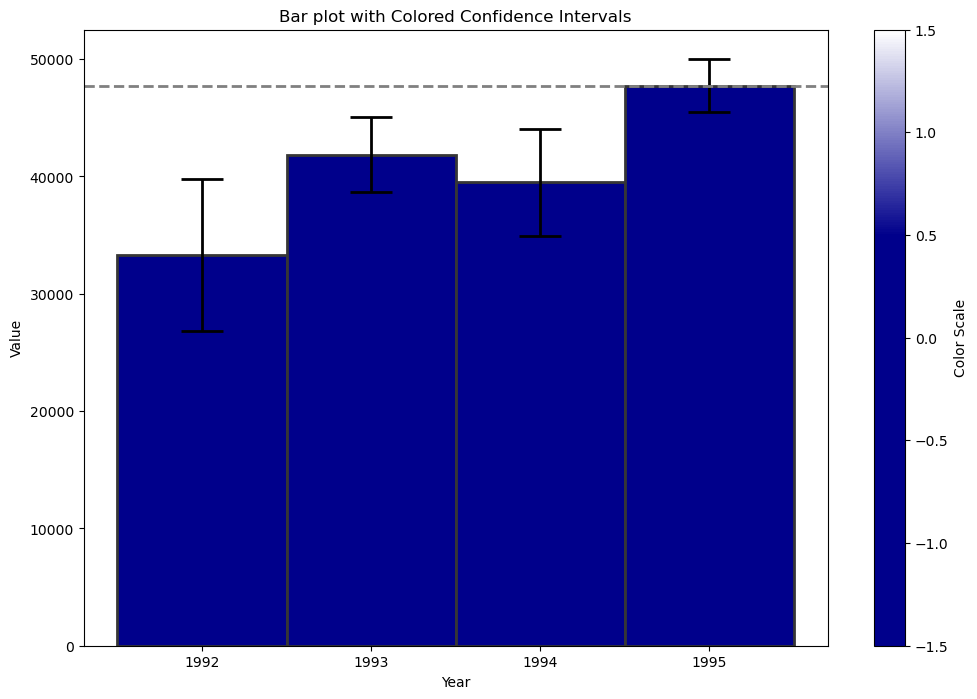

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import cm

# Set seed for reproducibility
np.random.seed(12345)

# Generate data and create DataFrame
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# rearranging df to appropriate orders
df = df.transpose()

# Calculate mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0]
conf_intervals = stats.t.ppf(0.975, n-1) * (stds / np.sqrt(n))
print(means)
# User-provided y-axis value of interest
y_value = 47743

# Function to determine color based on y-axis value
def bar_color(y, mean, conf_interval):
    if y > mean + conf_interval:
        return 'darkblue'   # Bar is dark blue if the value is certainly below this y-value
    elif y < mean - conf_interval:
        return 'darkred'    # Bar is dark red if the value is certainly not contained as the distribution is above the axis
    else:
        return 'white'      # Bar is white if the value equals the y-value

# Determine colors for each bar based on the relationship between y_value and mean with confidence intervals
colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]

# Create a custom colormap with the specified colors
cmap = LinearSegmentedColormap.from_list('custom', colors) #user defined color scale

# Plotting
plt.figure(figsize=(12,8))
bars = plt.bar(range(len(means)), means, yerr=conf_intervals, color=cmap(norm((means - y_value) / conf_intervals)), 
               capsize=15, width = 1, edgecolor='#363636', linewidth = 2, error_kw={'capthick':2, 'elinewidth':2})

plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  # Horizontal line for y-axis value of interest
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar plot with Colored Confidence Intervals')
plt.xticks(range(len(means)), means.index)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=-1.5, vmax=1.5))
sm.set_array([])
plt.colorbar(sm, label='Color Scale')

plt.show()


C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\2456930773.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\2456930773.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Color Scale')


([<matplotlib.axis.XTick at 0x25339cd9bd0>,
 [Text(0, 0, '1992'),
  Text(1, 0, '1993'),
  Text(2, 0, '1994'),
  Text(3, 0, '1995')])

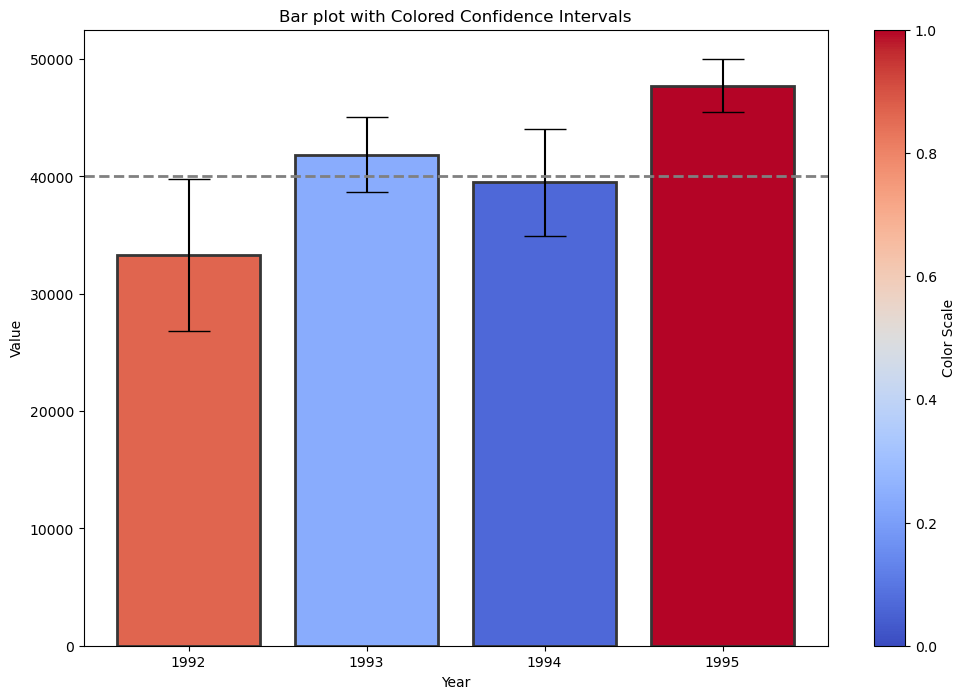

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Set seed for reproducibility
np.random.seed(12345)

# Generate data and create DataFrame
df = pd.DataFrame([np.random.normal(32000, 200000, 3650),
                   np.random.normal(43000, 100000, 3650),
                   np.random.normal(43500, 140000, 3650),
                   np.random.normal(48000, 70000, 3650)],
                  index=[1992, 1993, 1994, 1995])

# Transpose DataFrame
df = df.transpose()

# Calculate mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0]
conf_intervals = stats.t.ppf(0.975, n - 1) * (stds / np.sqrt(n))

# User-provided y-axis value of interest
y_value = 40000

# Calculate distance of each bar's mean value from y-value
distances = abs(means - y_value) / max(abs(means - y_value))

# Create a colormap based on distance from y-value
cmap = plt.cm.get_cmap('coolwarm')

# Plotting
plt.figure(figsize=(12, 8))

# Plot bars with colored based on data coverage
bars = plt.bar(range(len(means)), means, yerr=conf_intervals, 
               color=cmap(distances), align='center', 
               capsize=15, edgecolor='#363636', linewidth=2)

# Adding y-value line
plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  

# Adding color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=1)) 
sm.set_array([])
plt.colorbar(sm, label='Color Scale')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar plot with Colored Confidence Intervals')

# Setting x-axis ticks to represent years
plt.xticks(range(len(means)), means.index)

plt.show()


### Harder Option

C:\Users\Victor Darkwah-Owusu\AppData\Local\Temp\ipykernel_13604\3892630346.py:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Color Scale')


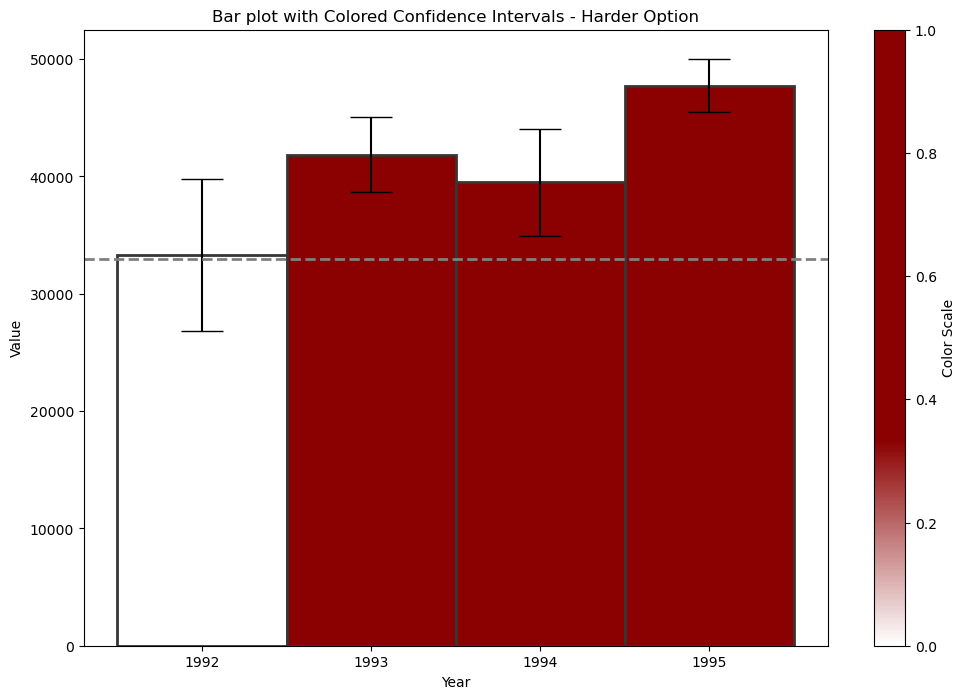

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize, LinearSegmentedColormap

np.random.seed(12345)

# DataFrame
df = pd.DataFrame([np.random.normal(32000, 200000, 3650),
                   np.random.normal(43000, 100000, 3650),
                   np.random.normal(43500, 140000, 3650),
                   np.random.normal(48000, 70000, 3650)],
                  index=[1992, 1993, 1994, 1995])

# Transpose DataFrame
df = df.transpose()

# mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0]
conf_intervals = stats.t.ppf(0.975, n - 1) * (stds / np.sqrt(n))

# User-provided y-axis value of interest
y_value = 33000

# Function to determine color based on the amount of data covered
def bar_color(y, mean, conf_interval):
    if y > mean + conf_interval:
        return 'darkblue'   # Bar is dark blue if the value is certainly above the y-axis value
    elif y < mean - conf_interval:
        return 'darkred'    # Bar is dark red if the value is certainly below the y-axis value
    else:
        return 'white'      # Bar is white if the value is equal to the y-axis value

# Determine colors for each bar based on the relationship between y_value and mean with confidence intervals
colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]
#             List compre to find out the col      # conditional statement to filter out these cals

# custom colormap with the specified colors
cmap = LinearSegmentedColormap.from_list('custom', colors)

# Plotting
plt.figure(figsize=(12, 8))

# Plot bars with colored based on data coverage
bars = plt.bar(range(len(means)), means, yerr=conf_intervals, width = 1,
               color=colors, align='center', capsize=15, 
               edgecolor='#363636', linewidth=2)

# Adding y-value line
plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  

# Adding color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, label='Color Scale')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar plot with Colored Confidence Intervals - Harder Option')

# Setting x-axis ticks to represent years
plt.xticks(range(len(means)), means.index)

plt.show()



# NB, in our custom color gradient, we included the confidence interval. So that means
# if the y_val shoutld touch the err, the color changes to white since at that point,
# y_value = mean_of_bar

### Even Harder option

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import Normalize, LinearSegmentedColormap
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Set seed for reproducibility
np.random.seed(12345)

# Generate data and create DataFrame
df = pd.DataFrame([np.random.normal(32000, 200000, 3650),
                   np.random.normal(43000, 100000, 3650),
                   np.random.normal(43500, 140000, 3650),
                   np.random.normal(48000, 70000, 3650)],
                  index=[1992, 1993, 1994, 1995])

# Transpose DataFrame
df = df.transpose()

# Calculate mean and 95% confidence interval for each year
means = df.mean()
stds = df.std()
n = df.shape[0]
conf_intervals = stats.t.ppf(0.975, n - 1) * (stds / np.sqrt(n))

# Initial y-value of interest
y_value = 33000

# Function to determine color based on the amount of data covered
def bar_color(y, mean, conf_interval):
    if y > mean + conf_interval:
        return 'darkblue'  
    elif y < mean - conf_interval:
        return 'darkred'    
    else:
        return 'white'     

# Determine colors for each bar based on the relationship between y_value and mean with confidence intervals
colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]
  
# Create a custom colormap with the specified colors
cmap = LinearSegmentedColormap.from_list('custom', colors)
 

# Plotting function
def plot(y_value):
    plt.figure(figsize=(12, 8))
    # Determine colors for each bar based on the relationship between y_value and mean with confidence intervals
    colors = [bar_color(y_value, mean, conf_interval) for mean, conf_interval in zip(means, conf_intervals)]
   
    # Create a custom colormap with the specified colors
    cmap = LinearSegmentedColormap.from_list('custom', colors)
    
    plt.gca().clear()  # Clear the previous plot

    # Plot bars with colored based on data coverage
    bars = plt.bar(range(len(means)), means, yerr=conf_intervals, 
                   color=colors, align='center', capsize=15, 
                   edgecolor='#363636', linewidth=2, width = 1)

    # Adding y-value line
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=2)  

    # Adding color bar legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=-1, vmax=1))
    sm.set_array([])
    plt.colorbar(sm, label='Color Scale')
    plt.text(len(means)-0.5, y_value, f' y = {y_value:.2f}', ha='right', va='bottom', 
             color='grey', weight='bold', zorder = 6 )
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Bar plot with Colored Confidence Intervals')

    # Setting x-axis ticks to represent years
    plt.xticks(range(len(means)), means.index)

    plt.show()

# Create a function to set y-value interactively using a text box
@interact
def set_y_value(y_value=str(y_value)):
    try:
        y_value = float(y_value)
        plot(y_value)
        
    except ValueError:
        print("Please enter a valid numeric value.")


interactive(children=(Text(value='33000', description='y_value'), Output()), _dom_classes=('widget-interact',)…

In [116]:
# !pip install mplcursors